<a href="https://colab.research.google.com/github/daradanci/MMO_2025/blob/main/notes/LR1_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
# История о данных: Fake News Dataset
# Студент: Зелинский Даниил Михайлович, группа ИУ5-25М

### Описание датасета: Fake News Dataset

Данный датасет содержит информацию о новостных статьях, включая как реальные, так и фейковые публикации. Цель анализа — исследовать различные характеристики новостей, такие как вовлечённость пользователей, уровень кликбейтности, эмоциональную окраску и степень достоверности источника.

---

#### Структура и признаки

| Название столбца       | Описание |
|------------------------|----------|
| `id`                   | Уникальный идентификатор статьи |
| `title`                | Заголовок статьи |
| `author`               | Автор статьи |
| `text`                 | Текст статьи |
| `state`                | Географическое местоположение |
| `date_published`       | Дата публикации |
| `source`               | Название источника (издания) |
| `category`             | Тематическая категория (Politics, Sports, Entertainment и др.) |
| `sentiment_score`      | Оценка эмоциональной окраски текста от -1 (негатив) до 1 (позитив) |
| `word_count`           | Количество слов в статье |
| `num_shares`           | Количество репостов |
| `num_comments`         | Количество комментариев |
| `political_bias`       | Политическая направленность источника (Left, Right, Center) |
| `fact_check_rating`    | Оценка достоверности (например, TRUE, FALSE, Mixed) |
| `is_satirical`         | Метка сатиричности (1 — сатирическая, 0 — обычная) |
| `trust_score`          | Уровень доверия к источнику (0–100) |
| `source_reputation`    | Репутация источника (оценка 0–10) |
| `clickbait_score`      | Степень кликбейтности заголовка (0–1) |
| `plagiarism_score`     | Оценка оригинальности контента (0–100) |
| `label`                | Целевая метка: `Fake` или `Real` |

---

#### Размер данных
- Количество признаков: **24**
- Количество строк: около **50 000**

---

#### Возможности анализа:
- Исследование различий между фейковыми и реальными новостями
- Связь между доверием, кликбейтностью, эмоциональной окраской и популярностью
- Влияние источника и категории на достоверность публикации


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Загрузка данных
file_path = "fake_news_dataset.csv"
df = pd.read_csv(file_path)

In [8]:
# Первичный обзор
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

,id,title,author,text,state,date_published,source,category,sentiment_score,word_count,...,num_shares,num_comments,political_bias,fact_check_rating,is_satirical,trust_score,source_reputation,clickbait_score,plagiarism_score,label
0,1,Breaking News 1,Jane Smith,This is the content of article 1. It contains ...,Tennessee,30-11-2021,The Onion,Entertainment,-0.22,1302,...,47305,450,Center,FALSE,1,76,6,0.84,53.35,Fake
1,2,Breaking News 2,Emily Davis,This is the content of article 2. It contains ...,Wisconsin,02-09-2021,The Guardian,Technology,0.92,322,...,39804,530,Left,Mixed,1,1,5,0.85,28.28,Fake
2,3,Breaking News 3,John Doe,This is the content of article 3. It contains ...,Missouri,13-04-2021,New York Times,Sports,0.25,228,...,45860,763,Center,Mixed,0,57,1,0.72,0.38,Fake
3,4,Breaking News 4,Alex Johnson,This is the content of article 4. It contains ...,North Carolina,08-03-2020,CNN,Sports,0.94,155,...,34222,945,Center,TRUE,1,18,10,0.92,32.20,Fake
4,5,Breaking News 5,Emily Davis,This is the content of article 5. It contains ...,California,23-03-2022,Daily Mail,Technology,-0.01,962,...,35934,433,Right,Mixed,0,95,6,0.66,77.70,Real


In [9]:
# Настройки графиков
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# Шаг 1: Распределение фейковых и настоящих новостей

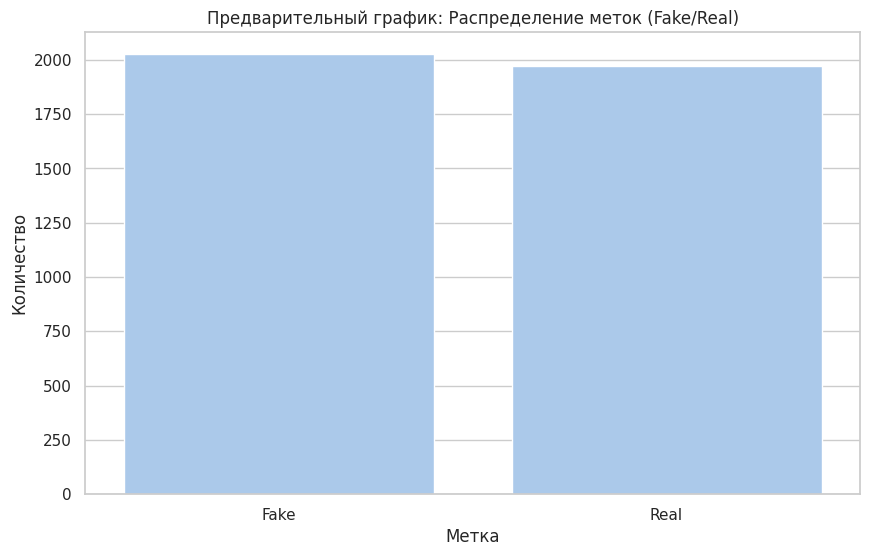

In [10]:

# Пробуем сначала простой barplot
sns.countplot(data=df, x="label")
plt.title("Предварительный график: Распределение меток (Fake/Real)")
plt.xlabel("Метка")
plt.ylabel("Количество")
plt.show()


<ipython-input-11-232164821381>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="label", palette="Set2")


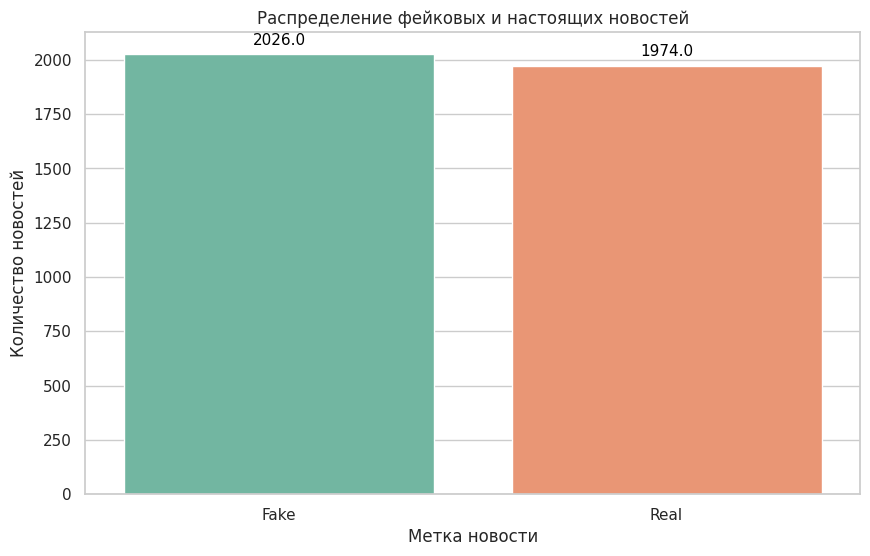

In [11]:
# Улучшенный вариант: добавим аннотацию и стиль
ax = sns.countplot(data=df, x="label", palette="Set2")
plt.title("Распределение фейковых и настоящих новостей")
plt.xlabel("Метка новости")
plt.ylabel("Количество новостей")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

# Шаг 2: Связь между кликбейтностью и меткой

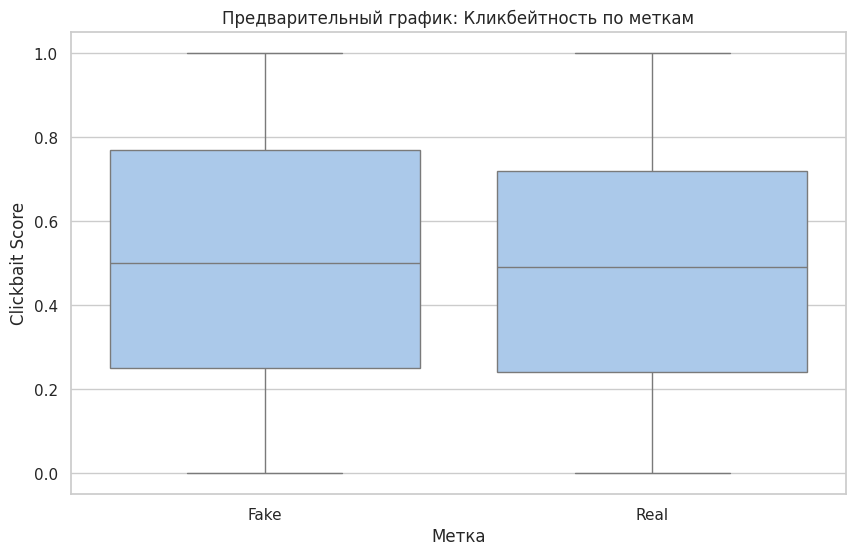

In [12]:
# Предварительный график: boxplot
sns.boxplot(data=df, x='label', y='clickbait_score')
plt.title("Предварительный график: Кликбейтность по меткам")
plt.xlabel("Метка")
plt.ylabel("Clickbait Score")
plt.show()

<ipython-input-13-c4209b02b788>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y='clickbait_score', palette='Set3')


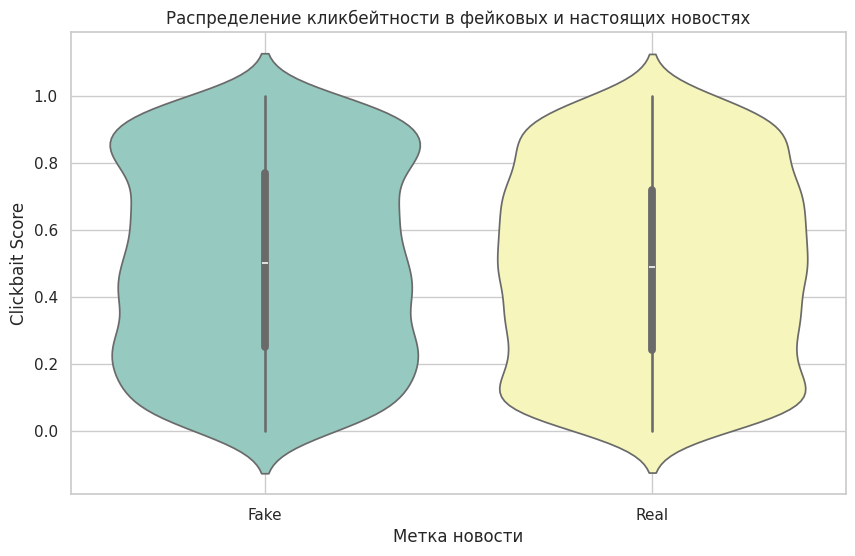

In [13]:
# Улучшенный вариант: violinplot
sns.violinplot(data=df, x='label', y='clickbait_score', palette='Set3')
plt.title("Распределение кликбейтности в фейковых и настоящих новостях")
plt.xlabel("Метка новости")
plt.ylabel("Clickbait Score")
plt.grid(True)
plt.show()


# Шаг 3: Эмоциональная окраска новостей по категориям

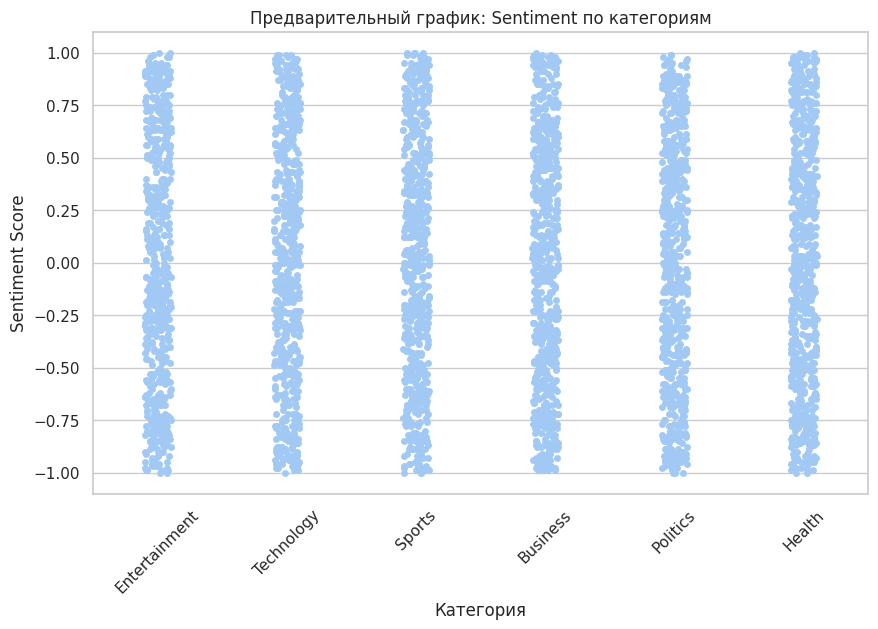

In [14]:
# Предварительный график: stripplot
sns.stripplot(data=df, x='category', y='sentiment_score', jitter=True)
plt.title("Предварительный график: Sentiment по категориям")
plt.xlabel("Категория")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.show()

<ipython-input-15-3775eefac75b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='sentiment_score', palette='Set1')


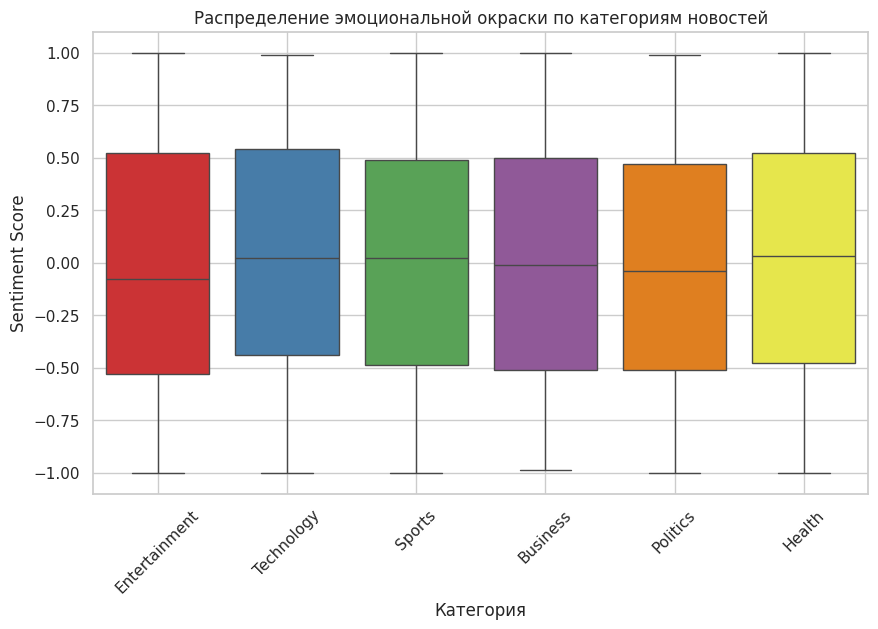

In [15]:
# Улучшенный вариант: boxplot с цветом по категории
sns.boxplot(data=df, x='category', y='sentiment_score', palette='Set1')
plt.title("Распределение эмоциональной окраски по категориям новостей")
plt.xlabel("Категория")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Шаг 4: Популярность новостей — комментарии и репосты

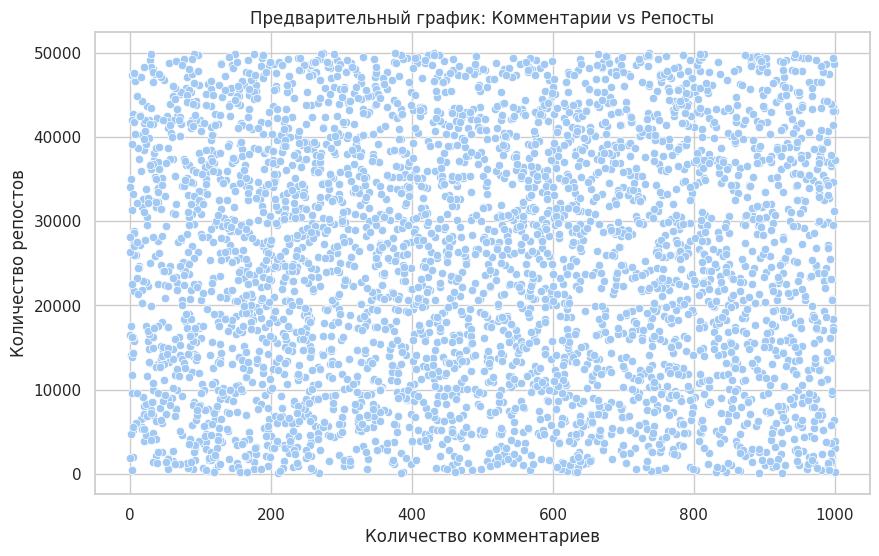

In [16]:
# Предварительный график: scatter без цвета
sns.scatterplot(data=df, x='num_comments', y='num_shares')
plt.title("Предварительный график: Комментарии vs Репосты")
plt.xlabel("Количество комментариев")
plt.ylabel("Количество репостов")
plt.show()

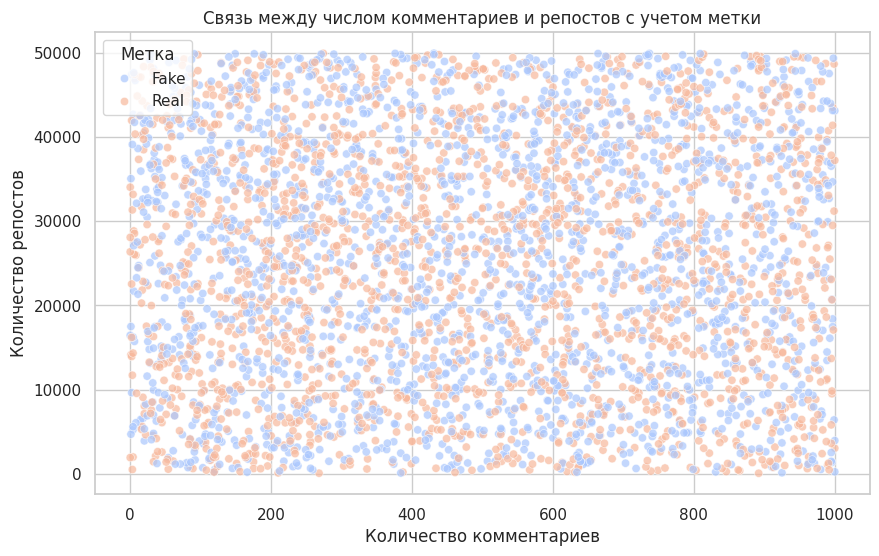

In [17]:
# Улучшенный вариант: scatterplot с цветом по метке
sns.scatterplot(data=df, x='num_comments', y='num_shares', hue='label', alpha=0.7, palette='coolwarm')
plt.title("Связь между числом комментариев и репостов с учетом метки")
plt.xlabel("Количество комментариев")
plt.ylabel("Количество репостов")
plt.legend(title="Метка")
plt.grid(True)
plt.show()

# Шаг 5: Корреляция между числовыми признаками

In [18]:
# Предварительный график: обычная корреляционная матрица
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)


                         id  sentiment_score  word_count  char_count  \
id                 1.000000         0.028511    0.029620    0.012643   
sentiment_score    0.028511         1.000000   -0.003991    0.009844   
word_count         0.029620        -0.003991    1.000000   -0.012238   
char_count         0.012643         0.009844   -0.012238    1.000000   
has_images         0.006378        -0.024369    0.028572   -0.022457   
has_videos         0.015019        -0.015398    0.009068    0.021137   
readability_score -0.001843        -0.002532    0.012947    0.000212   
num_shares        -0.005048         0.029162    0.001133    0.012026   
num_comments       0.008742        -0.021847    0.001400   -0.015914   
is_satirical      -0.011584         0.011913   -0.000479    0.007156   
trust_score       -0.007483         0.003390    0.002843    0.002987   
source_reputation  0.018605         0.009177   -0.008080    0.000701   
clickbait_score   -0.019242         0.014030   -0.034663   -0.01

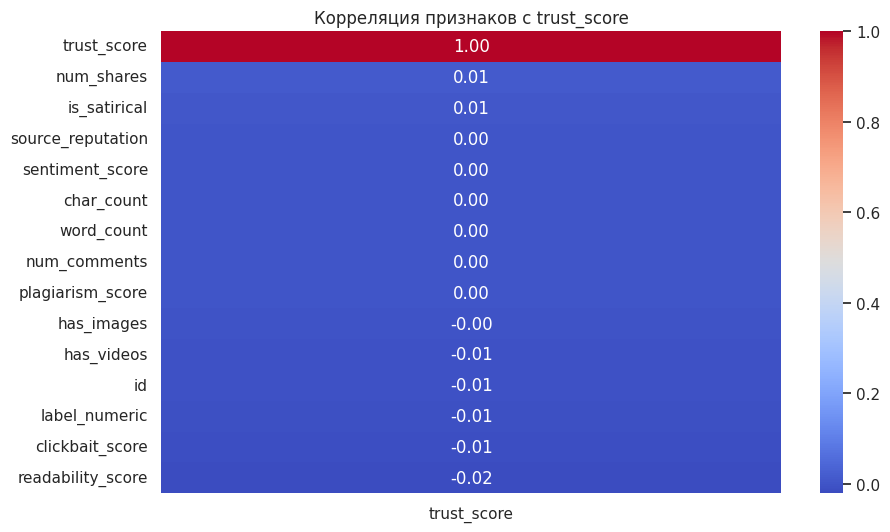

In [33]:
# Выбираем только числовые признаки
numeric_df = df.select_dtypes(include='number')

# Считаем корреляции только с trust_score
corr_with_trust = numeric_df.corr()['trust_score'].sort_values(ascending=False)

# Строим тепловую карту
sns.heatmap(corr_with_trust.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков с trust_score")
plt.show()

In [30]:
trust_corr = corr_matrix['trust_score'].drop('trust_score').sort_values()

<ipython-input-31-228f9a29760a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trust_corr.values, y=trust_corr.index, palette='crest')


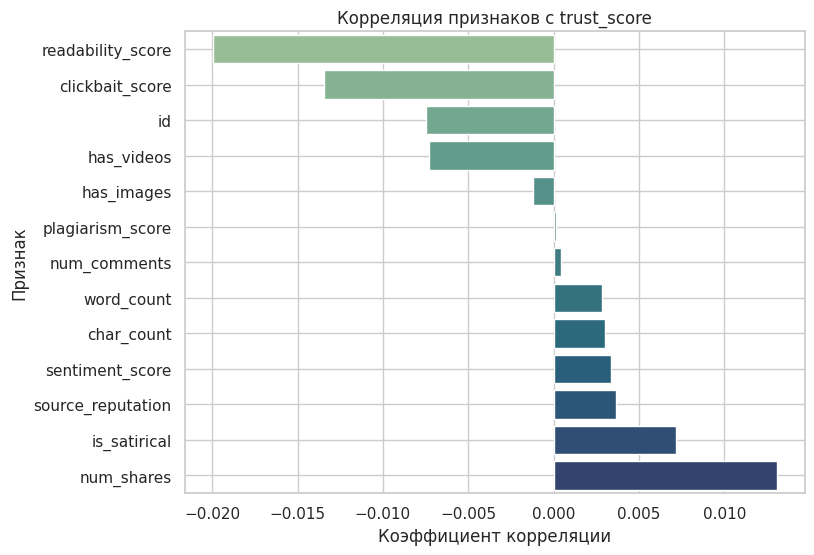

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=trust_corr.values, y=trust_corr.index, palette='crest')
plt.title("Корреляция признаков с trust_score")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Признак")
plt.grid(True)
plt.show()